In [2]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
# two random correlated variables
v = np.random.randn(10)
w = v + np.random.randn(len(v))

# correlation using mean-centered dot products

# mean-center
vm = v-np.mean(v)
wm = w-np.mean(w)

# dot products
r_me = np.dot(vm,wm) / np.sqrt(np.dot(vm,vm)*np.dot(wm,wm))


# correlation using numpy
r_np = np.corrcoef(v,w)[0,1]


# print results
print(f'r from np.corr: {r_np:.3f}')
print(f'r from np.dot : {r_me:.3f}')

r from np.corr: 0.571
r from np.dot : 0.571


# Exe 2

In [4]:
# create random data
N = 43
r = .4
x = np.random.randn(N)
y = np.random.randn(N)
y = x*r + y*np.sqrt(1-r**2)

# r,p from numpy
r_np = np.corrcoef(x,y)[0,1]
t = r_np*np.sqrt(N-2) / np.sqrt(1-r_np**2)
p_np = stats.t.sf(np.abs(t),N-2) * 2  

# r,p from scipy
r_sp,p_sp = stats.pearsonr(x,y)

# print correlation values
print(f'r (p) from numpy: {r_np:.4f} ({p_np:.4f})')
print(f'r (p) from scipy: {r_sp:.4f} ({p_sp:.4f})')

r (p) from numpy: 0.1447 (0.3544)
r (p) from scipy: 0.1447 (0.3544)


In [5]:
def getpvals(x,y):

  # r,p from numpy
  r_np = np.corrcoef(x,y)[0,1]
  t = r_np*np.sqrt(len(x)-2) / np.sqrt(1-r_np**2)
  p_np = stats.t.sf(np.abs(t),len(x)-2) * 2  # times 2 for a two-sided test

  # r,p from scipy
  r_sp,p_sp = stats.pearsonr(x,y)

  return p_np,p_sp

In [6]:
# range of correlation values
rvals = np.linspace(0,.99,40)

# results matrix
pvalues = np.zeros((len(rvals),2))


# run the experiment
for ri in range(len(rvals)):

  # create the data
  x = np.random.randn(44)
  y = np.random.randn(44)
  y = x*rvals[ri] + y*np.sqrt(1-rvals[ri]**2)

  # get the two p-values
  pvalues[ri,:] = getpvals(x,y)

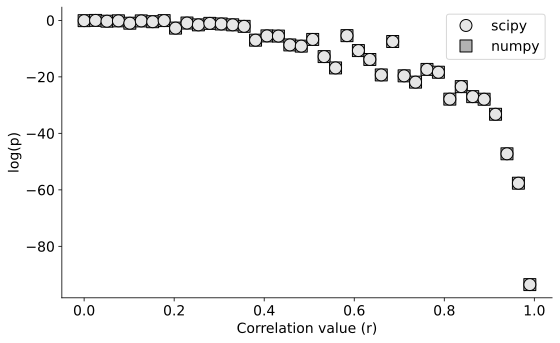

In [7]:
# plot
plt.figure(figsize=(8,5))
plt.plot(rvals,np.log(pvalues[:,1]),'ko',markersize=12,markerfacecolor=(.9,.9,.9),label='scipy')
plt.plot(rvals,np.log(pvalues[:,0]),'ks',markersize=12,markerfacecolor=(.7,.7,.7),label='numpy',zorder=-1)
plt.legend()
plt.xlabel('Correlation value (r)')
plt.ylabel('log(p)')

# display the results
plt.tight_layout()
plt.show()

# Exe 3

In [8]:
# matrix of p-values

N = 10000 # observations
M = 15 # features

# data matrix
X = np.random.randn(N,M)

# correlation matrix
R = np.corrcoef(X.T)

# confirm that it's the right shape
print(f'Correlation matrix shape: {R.shape}')

Correlation matrix shape: (15, 15)


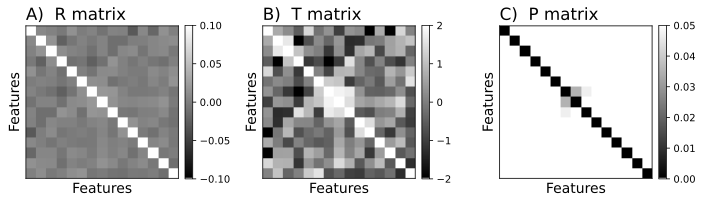

In [9]:
# compute the t-values
Tnum = R*np.sqrt(N-2)
Tden = np.sqrt(1-R**2) + np.finfo(float).eps # adding a tiny number to avoid n/0

T = Tnum / Tden

# compute the p-values
P = stats.t.sf(T,N-2)

# visualize all matrices
fig,axs = plt.subplots(1,3,figsize=(10,5))

cax = axs[0].imshow(R,vmin=-.1,vmax=.1,cmap='gray')
axs[0].set_title(r'A)  R matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

cax = axs[1].imshow(T,vmin=-2,vmax=2,cmap='gray')
axs[1].set_title(r'B)  T matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

cax = axs[2].imshow(P,vmin=0,vmax=.05,cmap='gray')
axs[2].set_title(r'C)  P matrix')
c = fig.colorbar(cax,fraction=.046,pad=.04); c.ax.tick_params(labelsize=10)

# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()

# Exe 4

In [10]:
# the sigma matrix
Sigma = np.std(X,ddof=1,axis=0)
Sigma = np.diag(Sigma)

# compute C from R
C_me = Sigma@R@Sigma 
C_np = np.cov(X.T,ddof=1) 

# check for equality (
(C_np-C_me)
     


array([[-8.88178420e-16, -4.33680869e-18, -1.73472348e-18,
        -6.93889390e-18, -8.67361738e-18,  3.03576608e-18,
         2.16840434e-18,  3.29597460e-17, -7.37257477e-18,
        -3.03576608e-18,  5.89805982e-17,  8.67361738e-18,
         6.93889390e-18, -2.25514052e-17, -1.08420217e-19],
       [-4.33680869e-18, -2.22044605e-16, -1.04083409e-17,
        -3.46944695e-17,  1.73472348e-18, -1.95156391e-18,
        -4.33680869e-18, -1.08420217e-17,  2.42861287e-17,
         2.08166817e-17,  2.16840434e-18, -5.42101086e-19,
         0.00000000e+00, -8.67361738e-18,  0.00000000e+00],
       [-1.51788304e-18, -6.93889390e-18, -8.88178420e-16,
         1.21430643e-17, -2.16840434e-18,  1.89735380e-19,
        -8.67361738e-18, -7.80625564e-18,  2.77555756e-17,
        -1.21430643e-17, -1.73472348e-17, -1.04083409e-17,
        -1.73472348e-18, -1.21430643e-17,  2.60208521e-18],
       [-6.93889390e-18, -3.81639165e-17,  1.38777878e-17,
         3.44169138e-15, -1.73472348e-17, -3.46944695

In [12]:
# compute R from C
invSigma = 1/np.std(X,ddof=1,axis=0)
invSigma = np.diag(Sigma)

R_me = invSigma@C_np@invSigma


# check for equality 
(R-R_me) < 1e-16

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

# Exe 5

In [13]:
# simulation parameters
N = 1000  
M =   20  

# number of repetitions
numReps = 30


# initialize data lists
alldata = np.zeros((M,N))
corrmats = np.zeros((M,M,numReps+1))

# pure data
covars = np.linspace(-1,1,M)[:,None]
dataOG = np.random.randn(N) * covars


# random noise in each repetition
for idx in range(numReps):

  # this run's data
  thisdata = dataOG + np.random.randn(M,N)*5

  # its correlation matrix
  corrmats[:,:,idx] = np.corrcoef(thisdata)

  # sum the data
  alldata += thisdata



# correlation of data average
corrmats[:,:,-1] = np.corrcoef(alldata)


/tmp/ipykernel_4943/473149221.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


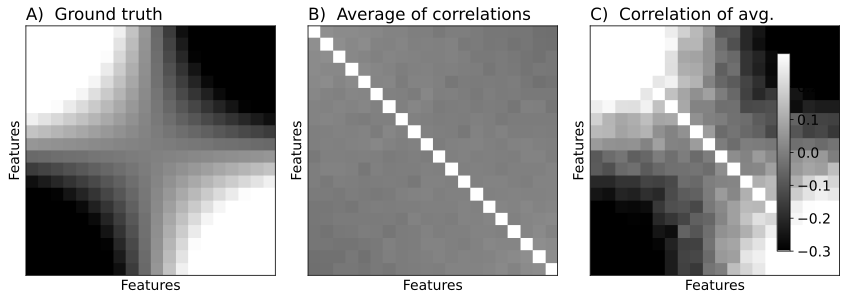

In [14]:
# plot
fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].imshow(covars@covars.T,vmin=-.3,vmax=.3,cmap='gray')
axs[0].set_title(r'A)  Ground truth')

axs[1].imshow(np.mean(corrmats[:,:,:-1],axis=2),vmin=-.3,vmax=.3,cmap='gray')
axs[1].set_title(r'B)  Average of correlations')

cax = axs[2].imshow(corrmats[:,:,-1],vmin=-.3,vmax=.3,cmap='gray')
axs[2].set_title(r'C)  Correlation of avg.')

cbar_ax = fig.add_axes([.91,.22,.015,.55])
cbar = plt.colorbar(cax,cax=cbar_ax)


# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 6

In [15]:
# re-initialize data lists
alldata = np.zeros((M,N))


# run the experiment
for idx in range(numReps):

  # this run's data 
  thisdata = np.random.randn(N)*covars + np.random.randn(M,N)

  # its corr matrix
  corrmats[:,:,idx] = np.corrcoef(thisdata)

  # store the data
  alldata += thisdata



# correlation of data average
corrmats[:,:,-1] = np.corrcoef(alldata)

/tmp/ipykernel_4943/935713016.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


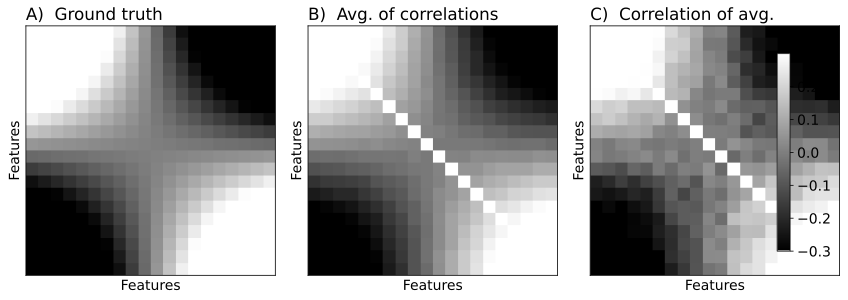

In [16]:
# plot
fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].imshow(covars@covars.T,vmin=-.3,vmax=.3,cmap='gray')
axs[0].set_title(r'A)  Ground truth')

axs[1].imshow(np.mean(corrmats[:,:,:-1],axis=2),vmin=-.3,vmax=.3,cmap='gray')
axs[1].set_title(r'B)  Avg. of correlations')

cax = axs[2].imshow(corrmats[:,:,-1],vmin=-.3,vmax=.3,cmap='gray')
axs[2].set_title(r'C)  Correlation of avg.')

cbar_ax = fig.add_axes([.91,.22,.015,.55])
cbar = plt.colorbar(cax,cax=cbar_ax)


# properties common to all axes
for a in axs:
  a.set(xticks=[],yticks=[],xlabel='Features',ylabel='Features')
  a.spines[['right','top']].set_visible(True)

# display the figure
plt.tight_layout()
plt.show()